In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
Sample = pd.read_csv("/content/drive/Shareddrives/PD_Fall2021/Data/FinalData1108.csv", sep=",", header=0)

In [ ]:
Sample.head()

,Unnamed: 0,Loan Identifier,Original Interest Rate,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,Status,Target,Monthly Reporting Period,MEV_PC1,MEV_PC2
0,0,100260169243,6.0,0.0,240,0.0,56.0,39.0,659.0,0,0,22006,5045.867481,-175.906070
1,1,100260169243,6.0,0.0,240,1.0,56.0,39.0,659.0,0,0,32006,4947.308940,-119.174256
2,2,100260169243,6.0,0.0,240,2.0,56.0,39.0,659.0,0,0,42006,4857.150390,-133.643988
3,3,100260169243,6.0,0.0,240,3.0,56.0,39.0,659.0,0,0,52006,4801.997933,-162.742979
4,4,100260169243,6.0,0.0,240,4.0,56.0,39.0,659.0,0,0,62006,4757.226434,-124.287310


In [ ]:
Sample.drop(['Unnamed: 0','Loan Identifier'], axis=1, inplace=True) ## remove unecessary column

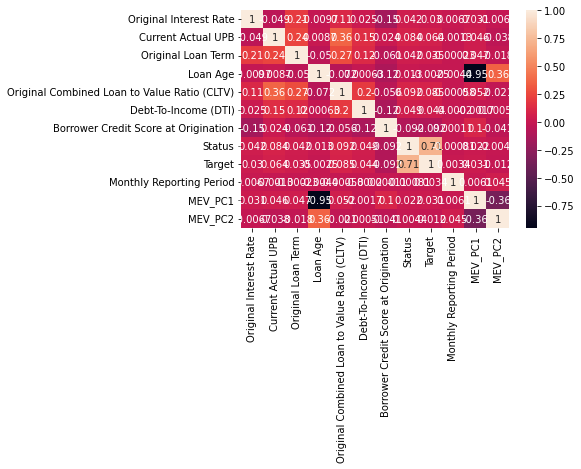

In [ ]:
## plot correlation heat map of all features
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = Sample.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#Sample.drop(['Loan Age','Current Loan Delinquency Status','PI'], axis=1, inplace=True) ## remove this columns since they correlates strongly

In [ ]:
DL_data = Sample[Sample['Status'] == 1] ## pick loans with current state delinquent
DL_data['Target'] = DL_data['Target'].map({1:'ADL', 0: 'CR', 2: 'DF', -1: 'PP'}) ## map new catergory name for delinquency
DL_data['Status'] = DL_data['Status'].map({1:'DL', 0: 'CR', 2: 'DF', -1: 'PP'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
DL_data['Target'].unique()

array(['ADL', 'DF', 'CR', 'PP'], dtype=object)

In [ ]:
DL_data['Status'].unique()

array(['DL'], dtype=object)

In [ ]:
DL_data = DL_data.rename(columns={'Monthly Reporting Period':'Date'})
DL_data.head()

,Original Interest Rate,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,Status,Target,Date,MEV_PC1,MEV_PC2
189,6.5,143750.8,240,61.0,64.0,43.0,642.0,DL,ADL,22011,2203.139428,-116.274496
190,6.5,143750.8,240,62.0,64.0,43.0,642.0,DL,ADL,32011,2136.642327,-113.742555
191,6.5,143750.8,240,63.0,64.0,43.0,642.0,DL,ADL,42011,2098.989053,-78.013898
192,6.5,143750.8,240,64.0,64.0,43.0,642.0,DL,ADL,52011,2058.738436,-92.399222
193,6.5,143750.8,240,65.0,64.0,43.0,642.0,DL,ADL,62011,2005.486693,-56.560232


In [ ]:
from sklearn import preprocessing 
DL_data = DL_data.sort_values(by='Date')
DL_data['Date'] = pd.to_datetime(DL_data['Date'],format = '%m%Y')
Y = DL_data['Target']
X = preprocessing.scale(DL_data.drop(['Target','Status','Date'], axis=1))
X_New=pd.DataFrame(data=X)

In [ ]:
X_New.head()

,0,1,2,3,4,5,6,7,8
0,1.668532,-1.555742,0.221514,-1.595097,-0.187646,-1.076566,0.063354,1.104622,-0.380993
1,0.388656,-0.247607,0.221514,-1.512358,0.349328,0.502816,-0.026179,1.104622,-0.380993
2,0.388656,1.797137,0.221514,-1.512358,1.087668,0.404104,-1.118482,1.104622,-0.380993
3,-0.251281,-0.629204,0.221514,-1.470989,-0.993108,1.687351,-0.061992,1.104622,-0.380993
4,0.388656,-2.914449,0.221514,-1.677835,0.684937,1.095083,-0.617097,1.104622,-0.380993


In [ ]:
X_New.columns = DL_data.drop(['Target','Status','Date'], axis=1).columns
X_New.insert(9, "intercept", 1) 

In [ ]:
X_New.head()

,Original Interest Rate,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,MEV_PC1,MEV_PC2,intercept
0,1.668532,-1.555742,0.221514,-1.595097,-0.187646,-1.076566,0.063354,1.104622,-0.380993,1
1,0.388656,-0.247607,0.221514,-1.512358,0.349328,0.502816,-0.026179,1.104622,-0.380993,1
2,0.388656,1.797137,0.221514,-1.512358,1.087668,0.404104,-1.118482,1.104622,-0.380993,1
3,-0.251281,-0.629204,0.221514,-1.470989,-0.993108,1.687351,-0.061992,1.104622,-0.380993,1
4,0.388656,-2.914449,0.221514,-1.677835,0.684937,1.095083,-0.617097,1.104622,-0.380993,1


In [ ]:
Y1=list(Y)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as st
from sklearn import metrics

m1 = st.MNLogit(Y1, X_New)
mlog_reg=m1.fit()
print(m1.fit().summary())
print(m1.fit().summary2())

y_pred = mlog_reg.predict(X_New)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.629944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.629944
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:               386522
Model:                        MNLogit   Df Residuals:                   386492
Method:                           MLE   Df Model:                           27
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                 0.02177
Time:                        03:48:32   Log-Likelihood:            -2.4349e+05
converged:                       True   LL-Null:                   -2.4891e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        y=CR       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

In [ ]:
y_pred

,0,1,2,3
0,0.851523,0.052367,0.077209,0.018901
1,0.853923,0.052420,0.081194,0.012464
2,0.850800,0.058407,0.083883,0.006911
3,0.852382,0.071702,0.067736,0.008180
4,0.859722,0.046859,0.077237,0.016182
...,...,...,...,...
386517,0.653297,0.217557,0.058953,0.070193
386518,0.665961,0.147532,0.073974,0.112533
386519,0.627821,0.193966,0.048108,0.130105
386520,0.578969,0.349692,0.035513,0.035826


In [ ]:
DL_data.insert(12, "intercept", 1)

In [ ]:
DL_data.head()

,Original Interest Rate,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,Status,Target,Date,MEV_PC1,MEV_PC2,intercept
6256695,7.00,119703.20,360,7.0,67.0,32.0,688.0,DL,CR,2007-01-01,4250.737357,-133.979009,1
922584,6.50,234951.03,360,9.0,75.0,48.0,683.0,DL,ADL,2007-01-01,4250.737357,-133.979009,1
5906568,6.50,415094.63,360,9.0,86.0,47.0,622.0,DL,ADL,2007-01-01,4250.737357,-133.979009,1
2858202,6.25,201332.03,360,10.0,55.0,60.0,681.0,DL,ADL,2007-01-01,4250.737357,-133.979009,1
10455828,6.50,0.00,360,5.0,80.0,54.0,650.0,DL,ADL,2007-01-01,4250.737357,-133.979009,1


In [ ]:
df = pd.DataFrame({'DL': y_pred.iloc[:, 0], 'CR': y_pred.iloc[:, 1],'DF': y_pred.iloc[:, 2], 'PP': y_pred.iloc[:, 3]}) # check your y_pred & make sure your label the right column
ym = DL_data['Date'].reset_index(drop=True, inplace=False)  # get the time variable column
df =  pd.concat([ym,df], axis=1)
pred_table = pd.pivot_table(df,index=["Date"],values = ['DL','CR','DF','PP'],aggfunc=np.mean)#Here, I want the plot of PPY,so I only use 'PPY' as value. 
                                                                                #If you want all the states value, set the all as value. 
pred_table=pred_table.replace(np.nan,0)
#transform into % format
pred_table['CR'] = pred_table['CR']*100 
pred_table['DF'] = pred_table['DF']*100
pred_table['DL'] = pred_table['DL']*100 
pred_table['PP'] = pred_table['PP']*100

print(pred_table) #check before plot
# Calculate the Historical probs
t_table = pd.pivot_table(DL_data,index=["Date"],columns = ['Target'],values = ['intercept'],aggfunc=np.size) # count number of loans with nxt_state by date
t_table=t_table.replace(np.nan,0)
t_table.columns = ['DL','CR','DF','PP'] # check your t_table & make sure your label the right column
test = pd.DataFrame(t_table)
test['P(DF)']=test['DF']/(test['CR']+test['DL']+test['PP']+test['DF'])*100 #modify the function and you can get P(DEL) as well
pred_table.index= pd.to_datetime(pred_table.index) 
test.index = pd.to_datetime(test.index)
print(test.index)

                   CR        DF         DL         PP
Date                                                 
2006-06-01   8.793114  5.859539  84.792934   0.554412
2006-07-01   5.660727  7.241449  85.692241   1.405583
2006-08-01   6.247864  7.274801  85.389911   1.087424
2006-09-01   6.730492  6.945802  85.128038   1.195668
2006-10-01   6.696733  7.067741  85.106770   1.128756
...               ...       ...        ...        ...
2019-11-01  28.065501  4.208459  59.010385   8.715655
2019-12-01  24.609040  4.592809  60.985568   9.812583
2020-01-01  28.677383  4.181666  57.750567   9.390384
2020-02-01  28.335714  3.925331  57.533419  10.205536
2020-03-01  22.936088  4.416875  62.294950  10.352087

[166 rows x 4 columns]
DatetimeIndex(['2006-06-01', '2006-07-01', '2006-08-01', '2006-09-01',
               '2006-10-01', '2006-11-01', '2006-12-01', '2007-01-01',
               '2007-02-01', '2007-03-01',
               ...
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',

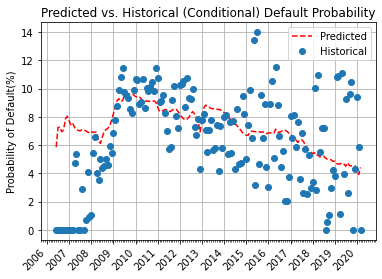

In [ ]:
import matplotlib.pyplot as plt

#plot
fig = plt.figure()
from matplotlib.dates import DateFormatter, YearLocator,MonthLocator
years = YearLocator()        # major ticks on the years
months = MonthLocator()              # minor ticks on the months
yearFormatter = DateFormatter('%Y')  # e.g.,  12
monthFormatter = DateFormatter('%m')      # e.g., 12
fig = plt.figure(1)
# plot the P(DF) for DEL Dataset
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearFormatter)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Default(%)')
plt.title('Predicted vs. Historical (Conditional) Default Probability')
plt.plot(pred_table.index,pred_table['DF'],'r--',label='Predicted')
# plt.hist(test.index,test['P(DF)'], bins = 10)
plt.plot(test.index,test['P(DF)'],'o',label='Historical')  # it's better to use histogram 
plt.grid()
plt.legend()
plt.show()

In [ ]:
pdl = pd.DataFrame(pred_table)

In [ ]:
pdl.head()

,CR,DF,DL,PP
Date,,,,
2006-06-01,8.793114,5.859539,84.792934,0.554412
2006-07-01,5.660727,7.241449,85.692241,1.405583
2006-08-01,6.247864,7.274801,85.389911,1.087424
2006-09-01,6.730492,6.945802,85.128038,1.195668
2006-10-01,6.696733,7.067741,85.106770,1.128756


In [ ]:
pdl.to_csv("/content/drive/Shareddrives/PD_Fall2021/Data/PD_DL.csv")

In [ ]:
#Below is our old code

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = Sample[['Original Interest Rate', 'Current Actual UPB','Original Loan Term','Original Combined Loan to Value Ratio (CLTV)', 'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination', 'Loan Purpose ', 'Property Type', 'HPI', 'CPI', 'RGDP', 'UEMP']]
y = Sample[['Target']]

In [ ]:
X = X.drop(columns = ['Loan Purpose ',"Property Type"])
X.head()

,Original Interest Rate,Current Actual UPB,Original Loan Term,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,HPI,CPI,RGDP,UEMP,Purpose,Property
0,6.0,0.0,240,56.0,39.0,659.0,183.288,0.201715,15244.088,4.8,1,4
1,6.0,0.0,240,56.0,39.0,659.0,184.365,0.553598,15244.088,4.7,1,4
2,6.0,0.0,240,56.0,39.0,659.0,184.329,0.850851,15281.525,4.7,1,4
3,6.0,0.0,240,56.0,39.0,659.0,184.157,0.496278,15281.525,4.6,1,4
4,6.0,0.0,240,56.0,39.0,659.0,183.508,0.197531,15281.525,4.6,1,4


In [ ]:
X.isnull().any()

Original Interest Rate                          False
Current Actual UPB                              False
Original Loan Term                              False
Original Combined Loan to Value Ratio (CLTV)    False
Debt-To-Income (DTI)                            False
Borrower Credit Score at Origination            False
HPI                                             False
CPI                                             False
RGDP                                            False
UEMP                                            False
Purpose                                         False
Property                                        False
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
result=logit_model.fit(batch_size=256)
stats1=result.summary()
stats2=result.summary2()

Optimization terminated successfully.
         Current function value: 0.201987
         Iterations 11


In [ ]:
print(stats1)

                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:             10644449
Model:                        MNLogit   Df Residuals:                 10644410
Method:                           MLE   Df Model:                           36
Date:                Fri, 05 Nov 2021   Pseudo R-squ.:                  0.1033
Time:                        14:59:14   Log-Likelihood:            -2.1500e+06
converged:                       True   LL-Null:                   -2.3978e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    Target=0       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           12.6365      0.107    118.388      0.000      12.427      12.846
Original Interest Rate       

In [ ]:
y_train["Target"].unique()

array([ 0, -1,  1,  2])

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [ ]:
preds = result.predict(sm.add_constant(X_test))
print(preds)

                 0         1         2         3
7583787   0.009117  0.863363  0.117939  0.009581
3246612   0.017430  0.950427  0.030156  0.001988
11195128  0.013770  0.904190  0.074723  0.007318
1258822   0.016758  0.939001  0.039374  0.004867
3990241   0.009094  0.986140  0.004558  0.000208
...            ...       ...       ...       ...
7847724   0.019794  0.975060  0.004812  0.000334
3066386   0.013446  0.979939  0.006403  0.000213
3921749   0.010869  0.927733  0.057423  0.003974
11822482  0.014272  0.951100  0.032327  0.002302
10227759  0.019507  0.932554  0.043286  0.004653

[2661113 rows x 4 columns]


In [ ]:
preds["Date"] = Sample.loc[preds.index,"Monthly Reporting Period"]
preds["Target"] = y_test["Target"]
preds[0] = preds[0]*100 
preds[1] = preds[1]*100
preds[2] = preds[2]*100
preds[3] = preds[3]*100 
preds

,0,1,2,3,Date,Target
7583787,0.911654,86.336329,11.793868,0.009581,122009,0
3246612,1.742989,95.042669,3.015580,0.001988,122011,0
11195128,1.376963,90.419003,7.472252,0.007318,42010,0
1258822,1.675769,93.900094,3.937432,0.004867,112010,0
3990241,0.909375,98.614037,0.455785,0.000208,112018,0
...,...,...,...,...,...,...
7847724,1.979367,97.506032,0.481183,0.000334,72009,0
3066386,1.344552,97.993866,0.640275,0.000213,72007,0
3921749,1.086948,92.773339,5.742301,0.003974,112012,0
11822482,1.427196,95.109971,3.232653,0.002302,92013,0


In [ ]:
preds["Date"] = pd.to_datetime(preds["Date"],format = '%m%Y')
preds = preds.set_index("Date")
preds = preds.sort_index()
pred_table = pd.pivot_table(preds[[0,1,2,3]],index=["Date"],values = [0,1,2,3],aggfunc=np.mean)

,0,1,2,3,Target
Date,,,,,
2009-12-01,0.911654,86.336329,11.793868,0.009581,0
2011-12-01,1.742989,95.042669,3.015580,0.001988,0
2010-04-01,1.376963,90.419003,7.472252,0.007318,0
2010-11-01,1.675769,93.900094,3.937432,0.004867,0
2018-11-01,0.909375,98.614037,0.455785,0.000208,0
...,...,...,...,...,...
2009-07-01,1.979367,97.506032,0.481183,0.000334,0
2007-07-01,1.344552,97.993866,0.640275,0.000213,0
2012-11-01,1.086948,92.773339,5.742301,0.003974,0


In [ ]:
preds.insert(4, "intercept", 1)

In [ ]:
t_table = pd.pivot_table(preds,index=["Date"],columns = ['Target'],values = ['intercept'],aggfunc=np.size)
t_table=t_table.replace(np.nan,0)
t_table.columns = [0,1,2,3]
test = pd.DataFrame(t_table)
test['P(2)']=test[2]/(test[2]+test[0]+test[1]+test[3])*100 
test

,0,1,2,3,P(2)
Date,,,,,
2006-01-01,0.0,308.0,0.0,0.0,0.000000
2006-02-01,5.0,484.0,0.0,0.0,0.000000
2006-03-01,4.0,738.0,0.0,0.0,0.000000
2006-04-01,14.0,3842.0,0.0,0.0,0.000000
2006-05-01,28.0,5856.0,0.0,0.0,0.000000
...,...,...,...,...,...
2019-11-01,23.0,2851.0,22.0,0.0,0.759669
2019-12-01,23.0,2832.0,31.0,1.0,1.073779
2020-01-01,21.0,2740.0,17.0,3.0,0.611291


In [ ]:
test.index == pred_table.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

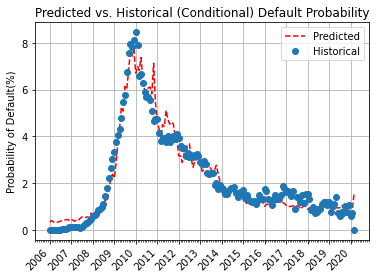

In [ ]:
import matplotlib.pyplot as plt

#plot
fig = plt.figure()
from matplotlib.dates import DateFormatter, YearLocator,MonthLocator
years = YearLocator()        # major ticks on the years
months = MonthLocator()              # minor ticks on the months
yearFormatter = DateFormatter('%Y')  # e.g.,  12
monthFormatter = DateFormatter('%m')      # e.g., 12
fig = plt.figure(1)
# plot the P(DF) for DEL Dataset
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(yearFormatter)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Probability of Default(%)')
plt.title('Predicted vs. Historical (Conditional) Default Probability')
plt.plot(pred_table.index,pred_table[2],'r--',label='Predicted')
# plt.hist(test.index,test['P(DF)'], bins = 10)
plt.plot(test.index,test['P(2)'],'o',label='Historical')  # it's better to use histogram 
plt.grid()
plt.legend()
plt.show()